In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from scipy.optimize import fmin_slsqp
plt.rcParams['figure.figsize'] = (10, 6)

Let's consider the function

$$
f(x,y) = (x-3)^2 + (y-4)^2 +1 
$$

We can find the minimum of this function quite easily. Let's take a look at the contour plot of the function.

(-60.0, 60.0, -60.0, 60.0)

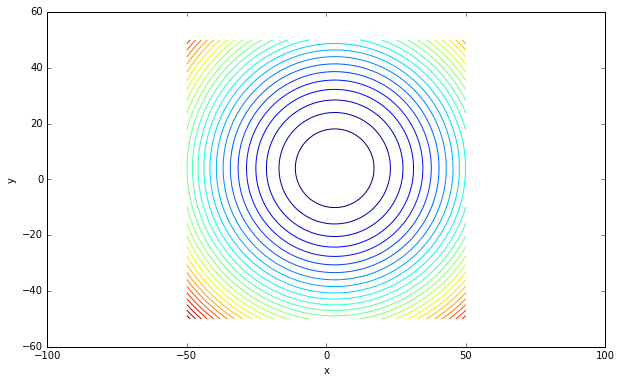

In [4]:
x = np.linspace(-50.,50.,100)
y = np.linspace(-50.,50.,100)
X, Y = np.meshgrid(x, y)
fXY = (X-3)**2 + (Y-4)**2 + 1
plt.contour(X, Y, fXY,30)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

**Question:** Interpret this plot

Now, let's suppose we want to minimize this function *subject to a constraint*. Specifically, we want to look for the values of x and y which are minimum within the unit circle, which is given by:
$$
x^2 + y^2 \le 1
$$

Let's first draw this situation:

(-60.0, 60.0, -60.0, 60.0)

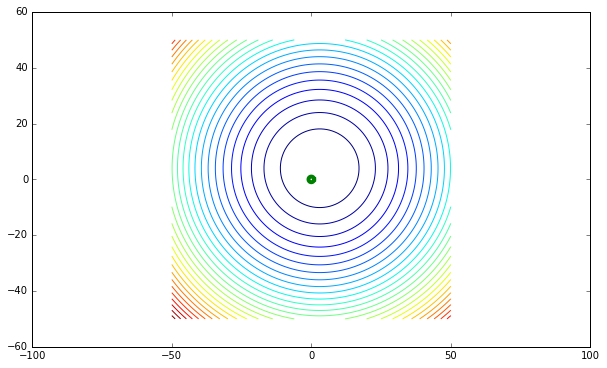

In [5]:
# This is a trick for drawing circles cleanly
th = np.linspace(0.,2*np.pi)
x_circ = np.cos(th)
y_circ = np.sin(th)
plt.contour(X, Y, fXY,30)
plt.plot(x_circ,y_circ,'g-',linewidth=4)
plt.axis('equal')

Let's set up the problem and call `fmin_slsqp()` to minimize it. 

(SLSQP is a very general-purpose optimization algorithm. It comes free with `scipy` and can handle constraints.)

In [6]:
def f(invars):
    x = invars[0]
    y = invars[1]
    
    return (x-3)**2 + (y-4)**2 + 1

In [7]:
def cons(invars):
    x = invars[0]
    y = invars[1]
    
    # Optimizer will ensure return value is >= 0
    return 1-x**2-y**2

In [8]:
minxy = fmin_slsqp(f,[0,0],f_ieqcons=cons)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 16.9999999999
            Iterations: 9
            Function evaluations: 38
            Gradient evaluations: 9


Finally, let's plot the minimum on top of the contour plot:

(-60.0, 60.0, -60.0, 60.0)

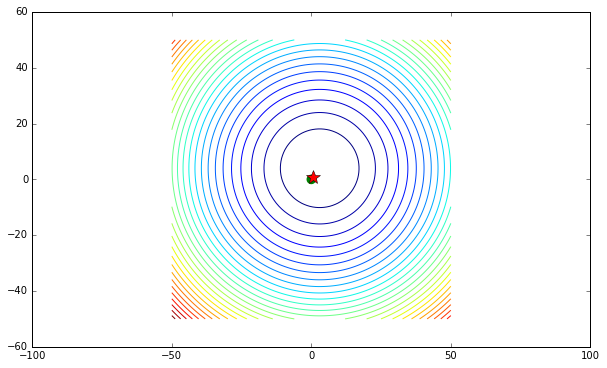

In [9]:
plt.contour(X, Y, fXY,30)
plt.plot(x_circ,y_circ,'g-',linewidth=4)
plt.plot(minxy[0],minxy[1],'r*',ms =15)
plt.axis('equal')